In [170]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
import pandas as pd


In [171]:
bitcoin = pd.read_excel("../predictive/BTC_price.xlsx")

In [172]:
bitcoin.head()

,time,PriceUSD,TxTfrCnt,TxTfrValAdjUSD,AdrActCnt,RevUSD,AdrBal1in100KCnt,AdrBal1in10BCnt,SplyCur,FlowOutExUSD
0,2018-01-01,13464.653612,677625,4.525439e+09,972783,3.268175e+07,9151,10968209,1.677635e+07,6.139170e+08
1,2018-01-02,14754.322205,960051,5.946500e+09,1142721,4.112588e+07,9157,11021304,1.677849e+07,7.232026e+08
2,2018-01-03,15010.286160,1049679,5.633952e+09,1130917,4.071571e+07,9141,11200226,1.678045e+07,7.110162e+08
3,2018-01-04,15070.300799,1191394,7.375467e+09,1253986,4.335752e+07,9128,11433416,1.678255e+07,1.085889e+09
4,2018-01-05,16997.227408,1002989,8.835936e+09,1069525,4.235392e+07,9145,11620327,1.678434e+07,1.203060e+09


In [173]:
# bitcoin['return'] = np.log(bitcoin['PriceUSD']/ bitcoin['PriceUSD'].shift(1))

In [174]:
# bitcoin.reset_index()

In [175]:
bitcoin.describe()

,PriceUSD,TxTfrCnt,TxTfrValAdjUSD,AdrActCnt,RevUSD,AdrBal1in100KCnt,AdrBal1in10BCnt,SplyCur,FlowOutExUSD
count,1826.000000,1.826000e+03,1.826000e+03,1.826000e+03,1.826000e+03,1826.000000,1.826000e+03,1.826000e+03,1.826000e+03
mean,20321.762897,7.228648e+05,6.132959e+09,8.363531e+05,2.298643e+07,9192.898686,1.380438e+07,1.823099e+07,5.598242e+08
std,16997.989067,1.363036e+05,6.463644e+09,1.795250e+05,1.488138e+07,142.219383,2.709590e+06,7.142216e+05,5.825269e+08
min,3185.074044,3.650310e+05,5.530820e+08,4.149920e+05,4.641244e+06,8931.000000,9.840852e+06,1.677635e+07,3.962783e+07
25%,7666.436451,6.309122e+05,1.689124e+09,7.001750e+05,1.236974e+07,9072.000000,1.118125e+07,1.762472e+07,1.831043e+08
50%,10956.466763,7.309730e+05,2.922937e+09,8.385750e+05,1.740005e+07,9177.500000,1.396306e+07,1.842069e+07,3.351514e+08
75%,33721.797950,8.197098e+05,8.904247e+09,9.660240e+05,3.131722e+07,9289.750000,1.592760e+07,1.883143e+07,7.321747e+08
max,67541.755508,1.191394e+06,3.646588e+10,1.366494e+06,7.783566e+07,9578.000000,1.886193e+07,1.924849e+07,6.004072e+09


---------------------------------Distributions of Key Variables---------------------------


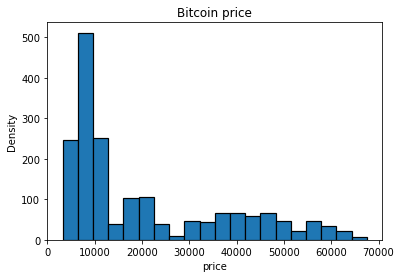

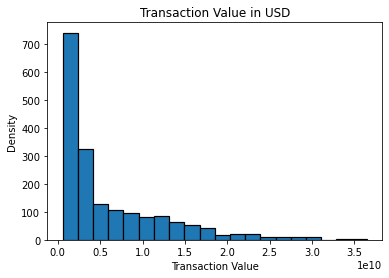

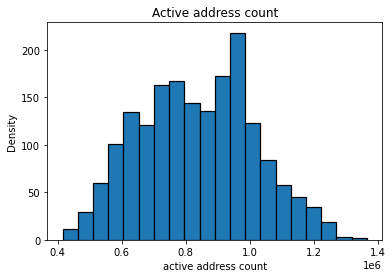

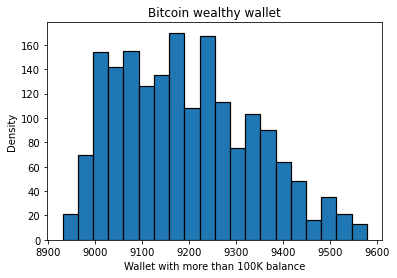

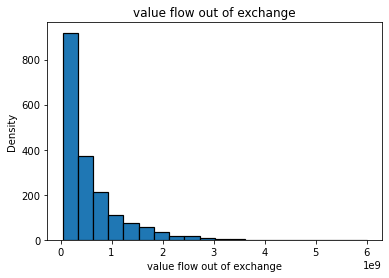

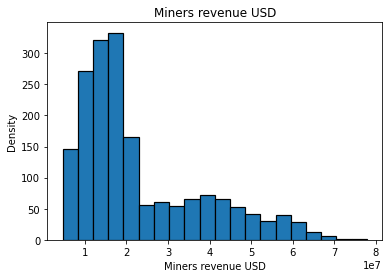

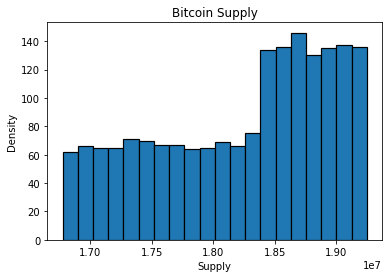

In [176]:
# Refer to the above line to check for desctiptive statistics

# Historgram and distribution of the data of interest - Use this line you are interested to graphically explore the data

print ("---------------------------------Distributions of Key Variables---------------------------")

plt.figure(1)
plt.hist(bitcoin['PriceUSD'], 20, edgecolor='black', linewidth=1.2)  
plt.xlabel('price')
plt.ylabel('Density')
plt.title('Bitcoin price')
plt.show()


plt.figure(1)
plt.hist(bitcoin['TxTfrValAdjUSD'], 20, edgecolor='black', linewidth=1.2)  
plt.xlabel('Transaction Value')
plt.ylabel('Density')
plt.title('Transaction Value in USD')
plt.show()


plt.figure(1)
plt.hist(bitcoin['AdrActCnt'], 20, edgecolor='black', linewidth=1.2)  
plt.xlabel('active address count')
plt.ylabel('Density')
plt.title('Active address count')
plt.show()

plt.figure(1)
plt.hist(bitcoin['AdrBal1in100KCnt'], 20, edgecolor='black', linewidth=1.2)  
plt.xlabel('Wallet with more than 100K balance')
plt.ylabel('Density')
plt.title('Bitcoin wealthy wallet')
plt.show()

plt.figure(1)
plt.hist(bitcoin['FlowOutExUSD'], 20, edgecolor='black', linewidth=1.2)  
plt.xlabel('value flow out of exchange')
plt.ylabel('Density')
plt.title('value flow out of exchange')
plt.show()

plt.figure(1)
plt.hist(bitcoin['RevUSD'], 20, edgecolor='black', linewidth=1.2)  
plt.xlabel('Miners revenue USD')
plt.ylabel('Density')
plt.title('Miners revenue USD')
plt.show()



plt.figure(1)
plt.hist(bitcoin['SplyCur'], 20, edgecolor='black', linewidth=1.2)  
plt.xlabel('Supply')
plt.ylabel('Density')
plt.title('Bitcoin Supply')
plt.show()

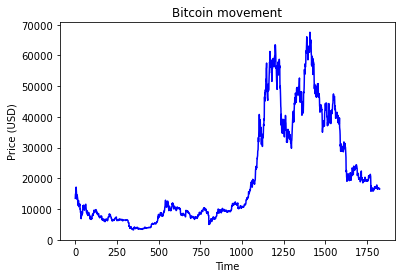

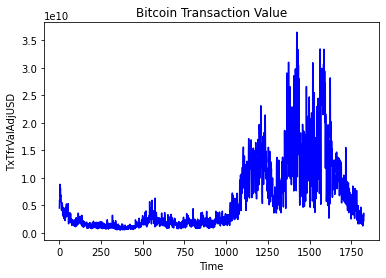

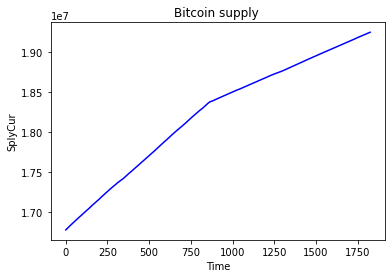

In [177]:
plt.figure(1)
plt.plot(bitcoin['PriceUSD'], color='blue') 
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.title('Bitcoin movement')
plt.grid(False) # I have added this for me to be able to accurately see the graph
plt.show()


plt.figure(1)
plt.plot(bitcoin['TxTfrValAdjUSD'], color='blue') 
plt.xlabel('Time')
plt.ylabel('TxTfrValAdjUSD')
plt.title('Bitcoin Transaction Value')
plt.grid(False) # I have added this for me to be able to accurately see the graph
plt.show()


plt.figure(1)
plt.plot(bitcoin['SplyCur'], color='blue') 
plt.xlabel('Time')
plt.ylabel('SplyCur')
plt.title('Bitcoin supply ')
plt.grid(False) # I have added this for me to be able to accurately see the graph
plt.show()

In [178]:
bitcoin.isnull().sum()

time                0
PriceUSD            0
TxTfrCnt            0
TxTfrValAdjUSD      0
AdrActCnt           0
RevUSD              0
AdrBal1in100KCnt    0
AdrBal1in10BCnt     0
SplyCur             0
FlowOutExUSD        0
dtype: int64

In [179]:
bitcoin.dropna(inplace=True)

---------------------------------Scatter Plots:Bitcoin price against Other variables ----------------


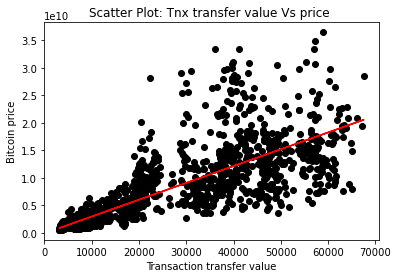

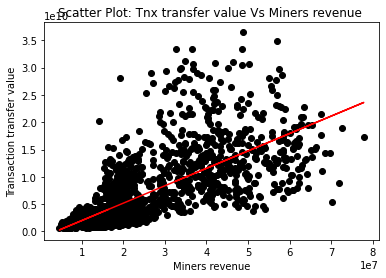

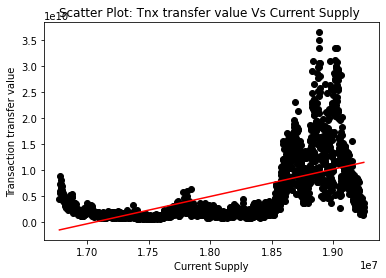

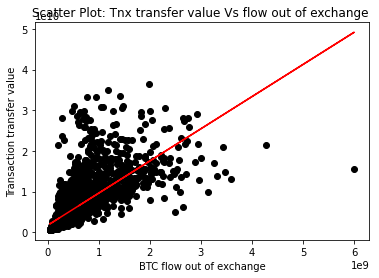

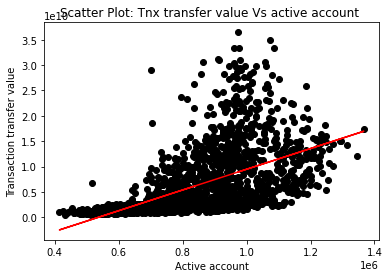

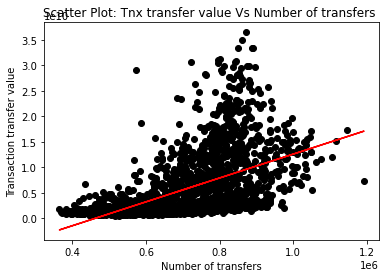

In [180]:
# Scatter plots:
# There are two purposes here: the first is to explore the relationship between lwage and other forcing variables
# The second purpose is to explore the source of heteroskedasticity if any. 

print ("---------------------------------Scatter Plots:Bitcoin price against Other variables ----------------")


plt.figure(2)
plt.scatter(bitcoin['PriceUSD'], bitcoin['TxTfrValAdjUSD'], color='black') 

# optional: adding fitted line 
m, b = np.polyfit(bitcoin['PriceUSD'],bitcoin['TxTfrValAdjUSD'], 1)  # m = slope, b=intercept
plt.plot(bitcoin['PriceUSD'], m*bitcoin['PriceUSD'] + b, color='red')


plt.xlabel('Transaction transfer value')
plt.ylabel('Bitcoin price')
plt.title('Scatter Plot: Tnx transfer value Vs price ')
plt.show()


plt.figure(2)
plt.scatter(bitcoin['RevUSD'], bitcoin['TxTfrValAdjUSD'], color='black') 

# optional: adding fitted line 
m, b = np.polyfit(bitcoin['RevUSD'],bitcoin['TxTfrValAdjUSD'], 1)  # m = slope, b=intercept
plt.plot(bitcoin['RevUSD'], m*bitcoin['RevUSD'] + b, color='red')


plt.xlabel('Miners revenue')
plt.ylabel('Transaction transfer value')
plt.title('Scatter Plot: Tnx transfer value Vs Miners revenue ')
plt.show()


plt.figure(2)
plt.scatter(bitcoin['SplyCur'], bitcoin['TxTfrValAdjUSD'], color='black') 

# optional: adding fitted line 
m, b = np.polyfit(bitcoin['SplyCur'],bitcoin['TxTfrValAdjUSD'], 1)  # m = slope, b=intercept
plt.plot(bitcoin['SplyCur'], m*bitcoin['SplyCur'] + b, color='red')


plt.xlabel('Current Supply')
plt.ylabel('Transaction transfer value')
plt.title('Scatter Plot: Tnx transfer value Vs Current Supply ')
plt.show()




plt.figure(2)
plt.scatter(bitcoin['FlowOutExUSD'], bitcoin['TxTfrValAdjUSD'], color='black') 

# optional: adding fitted line 
m, b = np.polyfit(bitcoin['FlowOutExUSD'],bitcoin['TxTfrValAdjUSD'], 1)  # m = slope, b=intercept
plt.plot(bitcoin['FlowOutExUSD'], m*bitcoin['FlowOutExUSD'] + b, color='red')


plt.xlabel('BTC flow out of exchange')
plt.ylabel('Transaction transfer value')
plt.title('Scatter Plot: Tnx transfer value Vs flow out of exchange ')
plt.show()


plt.figure(2)
plt.scatter(bitcoin['AdrActCnt'], bitcoin['TxTfrValAdjUSD'], color='black') 

# optional: adding fitted line 
m, b = np.polyfit(bitcoin['AdrActCnt'],bitcoin['TxTfrValAdjUSD'], 1)  # m = slope, b=intercept
plt.plot(bitcoin['AdrActCnt'], m*bitcoin['AdrActCnt'] + b, color='red')


plt.xlabel('Active account')
plt.ylabel('Transaction transfer value')
plt.title('Scatter Plot: Tnx transfer value Vs active account ')
plt.show()

plt.figure(2)
plt.scatter(bitcoin['TxTfrCnt'], bitcoin['TxTfrValAdjUSD'], color='black') 

# optional: adding fitted line 
m, b = np.polyfit(bitcoin['TxTfrCnt'],bitcoin['TxTfrValAdjUSD'], 1)  # m = slope, b=intercept
plt.plot(bitcoin['TxTfrCnt'], m*bitcoin['TxTfrCnt'] + b, color='red')


plt.xlabel('Number of transfers')
plt.ylabel('Transaction transfer value')
plt.title('Scatter Plot: Tnx transfer value Vs Number of transfers ')
plt.show()





In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.stats.diagnostic import het_white
from statsmodels.compat import lzip 
import statsmodels.api as sm

In [197]:
# Next is running a linear regression using OLS estimator

# The linear regression is used only on two varaibles for now. We will extend the analysis later
# The point here is to learn how to run regression and interpret Python output
# The equation: wage=b_0+b_1*educ+b_2*hours+u


formula='TxTfrValAdjUSD  ~ RevUSD  + PriceUSD +  SplyCur  + FlowOutExUSD +  AdrBal1in100KCnt + TxTfrCnt'  # linear equation, the first variable is dependent and the rest are explanatory
# Please pay attenting to the wording used to describe educ and hours: they are explanatory and not independent. 
# the latter requires very strong assumptions to confirm. In our case, we do not know.

results=smf.ols(formula, bitcoin).fit()  # the OLS library, we called the output 'results'


print('******************* Linear Regression Output **********************************')

print(results.summary())

print('*******************************************************************************')



******************* Linear Regression Output **********************************
                            OLS Regression Results                            
Dep. Variable:         TxTfrValAdjUSD   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     725.0
Date:                Wed, 11 Jan 2023   Prob (F-statistic):               0.00
Time:                        01:19:41   Log-Likelihood:                -42724.
No. Observations:                1826   AIC:                         8.546e+04
Df Residuals:                    1819   BIC:                         8.550e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

In [198]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(results.resid)

0.5843007339476585

In [183]:
# #The following is optional. You may finn testing restrictions very useful when doing empirical work
# # Example:Suppose now you have claim that education should increase the wage rate by 10%.
# # We wish to test this claim using the model above.
# # We have to run linear restriction test using F test. Here is how is it done.

# hypotheses='AdrBal1in100KCnt=0.1' # set educ slope to equal 10%. Think why is set this way?  

# f_test=results.f_test(hypotheses) # call the results and use them to compute the F test


# print('*******************Hypothesis Test**********************************')
# print("testing the restriction AdrBal1in100KCnt=0.1 =", f_test)
# print('********************************************************************')


# # You can also try the alternative way

# hypotheses='AdrBal1in100KCnt-0.1=0' # set educ slope to equal 10%. Think why is set this way?  

# f_testa=results.f_test(hypotheses) # call the results and use them to compute the F test


# print('*******************Hypothesis Test**********************************')
# print(f_testa)
# print('********************************************************************')


# # This what you have been doing in Data Analytics. Now we need to go beyond the basics.
# # First, does your regression satisfy the two assumptions we set in theory? 
# # If it fails to do so, then the OLS estimator is not BLUE and we cannot rely on it.

# # Start with the error term: Heteroskedasticity
# # Step 1: Inspect residuals, Step 2: formally test them


---------------------------------Plot of Residuals ---------------------------
Use the plot to visually inspect the presence of autocorrelation


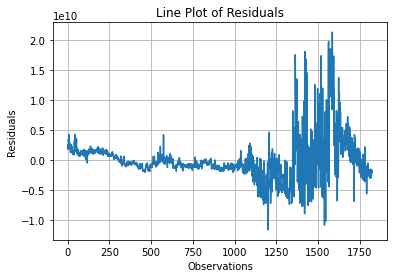

The plot of residuals shows a random patterns across individuals. This may suggest the presence of no autocorrelation
---------------------------------End of Plot of Residuals ---------------------------


In [184]:
# Let's now learn about the properties of the residuals
# Begin with plotting residuals 
# The plot of residuals against observations will help to detect the presence of autocorrelation in the data

print ("---------------------------------Plot of Residuals ---------------------------")
print ("Use the plot to visually inspect the presence of autocorrelation")
plt.figure(1)
plt.plot(results.resid) 
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.title('Line Plot of Residuals')
plt.grid(True) # I have added this for me to be able to accurately see the graph
plt.show()


print ("---------------------------------End of Plot of Residuals ---------------------------")



In [199]:
import matplotlib.pyplot as plt

plt.scatter(results.resid,y_pred)

plt.show()

NameError: name 'residuals' is not defined

In [187]:
# #Inspecting heteroskedacitiy formally using the white test

# mean_resid=results.resid.mean()
# print(mean_resid)



# print ("---------------------------------White Test------------------------------------------")

# # White test for heteroskedasticity
# # name=['lm', 'lmpval', 'fval', 'fpval' ]
# # white_test =sms.het_white(results.resid,results.model.exog)  # make sure you have the right library

# # print(lzip(name,white_test))

     
# print ("--------------------------------- End of White Test------------------------------------------")

# # If there is heteroskedasticity, then we need to correct it. The previous regression is incorrect
# # because it is based on the wrong aussmption about the errors and therefore the t statistics are
# # incorrect.

# # White Robust Standard Errors


# #perform White's test
# white_test = het_white(results.resid,  results.model.exog)

# #define labels to use for output of White's test
# labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

# #print results of White's test
# print(dict(zip(labels, white_test)))


In [188]:
# Restimate the model using White Robust Standard Errors

formula='TxTfrValAdjUSD  ~ RevUSD  + PriceUSD +  SplyCur  + FlowOutExUSD +  AdrBal1in100KCnt + TxTfrCnt' # linear equation, the first variable is dependent and the rest are explanatory
# Please the wording used to describe educ and hours: they are explanatory and not independent. 
# the latter requires very strong assumptions to confirm. In our case, we do not know.

results1=smf.ols(formula, bitcoin).fit(cov_type='HC1')  # the OLS library, we called the output 'results'

print('******************* Linear Regression Output **********************************')

print(results1.summary())

print('*******************************************************************************')


******************* Linear Regression Output **********************************
                            OLS Regression Results                            
Dep. Variable:         TxTfrValAdjUSD   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.704
Method:                 Least Squares   F-statistic:                     513.7
Date:                Wed, 11 Jan 2023   Prob (F-statistic):               0.00
Time:                        00:23:02   Log-Likelihood:                -42724.
No. Observations:                1826   AIC:                         8.546e+04
Df Residuals:                    1819   BIC:                         8.550e+04
Df Model:                           6                                         
Covariance Type:                  HC1                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------

In [196]:
from statsmodels.stats.stattools import durbin_watson

durbin_watson(results.resid)

0.5843007339476585

In [205]:
# Further example using different models and different data sets

import pandas as pd
import numpy as np

# data=pd.read_excel('C:/IssamMalki/Python Codes/Predictive Analytics Sessions/nls80.xls')

# data=data.dropna()  # drops missing values (you must specify them in the excel file as NaN)

controls = ['TxTfrCnt', 'AdrBal1in100KCnt','PriceUSD']  # set the control variables

print(bitcoin[['TxTfrValAdjUSD', 'FlowOutExUSD'] + controls].describe(percentiles=[]))  # describing data. lwage is the dependent variable, educ is impact variable

instruments = ['SplyCur', 'RevUSD']   # set the instruments - all are meant to capture the changes in education

print(bitcoin[instruments].describe(percentiles=[]))

# Let's try and explore more about the relationship between endogenous and instruments

print('Correlation matrix')
print(bitcoin[['FlowOutExUSD']  + ['RevUSD']+ instruments].corr())

# Running OLS regression: note here I am adding the library at this stage to make sure we 
# understand the function of each library 

from statsmodels.api import OLS, add_constant
from linearmodels.iv import IV2SLS

# Set the model


bitcoin['const'] = 1  # if you are using this approach, you must add the constant.
controls = ['const'] + controls

# OLS estimation 
ivolsmod = IV2SLS(bitcoin.TxTfrValAdjUSD, bitcoin[['FlowOutExUSD'] + ['SplyCur'] + [ 'RevUSD'] + controls], None, None)
ols_output = ivolsmod.fit(cov_type='robust')
print(ols_output.summary)

#2SLS: Over-identified model - using the one instrument identified
iv2slsmod2 = IV2SLS(bitcoin.TxTfrValAdjUSD, bitcoin[controls], bitcoin['FlowOutExUSD'], bitcoin['SplyCur'])
tsls_output= iv2slsmod2.fit(cov_type='robust')
print(tsls_output.summary)

#2SLS: Over-identified model - using the whole set of instruments identified
iv2slsmod2 = IV2SLS(bitcoin.TxTfrValAdjUSD, bitcoin[controls], bitcoin['FlowOutExUSD'], bitcoin[['SplyCur'] + ['RevUSD']])
tsls2_output= iv2slsmod2.fit(cov_type='robust')
print(tsls2_output.summary)

# Comparing all models 

from collections import OrderedDict
from linearmodels.iv.results import compare

res = OrderedDict()
res['OLS'] = ols_output
res['2SLS-one Z'] = tsls_output
res['2SLS-all Z'] = tsls2_output

print(compare(res))

       TxTfrValAdjUSD  FlowOutExUSD      TxTfrCnt  AdrBal1in100KCnt  \
count    1.826000e+03  1.826000e+03  1.826000e+03       1826.000000   
mean     6.132959e+09  5.598242e+08  7.228648e+05       9192.898686   
std      6.463644e+09  5.825269e+08  1.363036e+05        142.219383   
min      5.530820e+08  3.962783e+07  3.650310e+05       8931.000000   
50%      2.922937e+09  3.351514e+08  7.309730e+05       9177.500000   
max      3.646588e+10  6.004072e+09  1.191394e+06       9578.000000   

           PriceUSD  
count   1826.000000  
mean   20321.762897  
std    16997.989067  
min     3185.074044  
50%    10956.466763  
max    67541.755508  
            SplyCur        RevUSD
count  1.826000e+03  1.826000e+03
mean   1.823099e+07  2.298643e+07
std    7.142216e+05  1.488138e+07
min    1.677635e+07  4.641244e+06
50%    1.842069e+07  1.740005e+07
max    1.924849e+07  7.783566e+07
Correlation matrix
              FlowOutExUSD    RevUSD   SplyCur    RevUSD
FlowOutExUSD      1.000000  0.6837

print(compare(res))

In [206]:
print(compare(res))

                               Model Comparison                              
                                    OLS         2SLS-one Z         2SLS-all Z
-----------------------------------------------------------------------------
Dep. Variable            TxTfrValAdjUSD     TxTfrValAdjUSD     TxTfrValAdjUSD
Estimator                           OLS            IV-2SLS            IV-2SLS
No. Observations                   1826               1826               1826
Cov. Est.                        robust             robust             robust
R-squared                        0.7051             0.4296             0.6865
Adj. R-squared                   0.7042             0.4283             0.6858
F-statistic                      3094.2             1495.7             2627.1
P-value (F-stat)                 0.0000             0.0000             0.0000
==================     ================   ================   ================
FlowOutExUSD                     2.8255            -5.8555      

In [208]:
s = bitcoin['TxTfrValAdjUSD'].dropna()

In [211]:
s = bitcoin['TxTfrValAdjUSD'].dropna()
from statsmodels.tsa.stattools import adfuller
result = adfuller(s)
print('ADF statisitc', result[0])
print('p value', result[1])
print('critical values')
for key, value in result[4].items():
    print(key,value)

ADF statisitc -2.2798483946815082
p value 0.17854965053092758
critical values
1% -3.4339800605797155
5% -2.8631434696839992
10% -2.5676236347535166


In [212]:
s = bitcoin['TxTfrValAdjUSD'].pct_change(1).dropna()
from statsmodels.tsa.stattools import adfuller
result = adfuller(s)
print('ADF statisitc', result[0])
print('p value', result[1])
print('critical values')
for key, value in result[4].items():
    print(key,value)

ADF statisitc -8.057877644070862
p value 1.6734476108759796e-12
critical values
1% -3.4339800605797155
5% -2.8631434696839992
10% -2.5676236347535166
